# Fundamentals of Machine Learning - Exercise 2
* The aim of the exercise is to learn basic techniques for visualization creation and interpretation using Matplotlib and Seaborn libraries.

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_02.png?raw=true)

# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [17]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

from fml_01 import avg_price_by_year

## Load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [18]:
df = pd.read_csv("datasets/zsu_cv1_data.csv")

## Price is the most interisting attribute in our dataset, let's take a look on its distribution
- SalePrice

## Vizualize house prices in form of histogram
- What does it tell us about the prices?

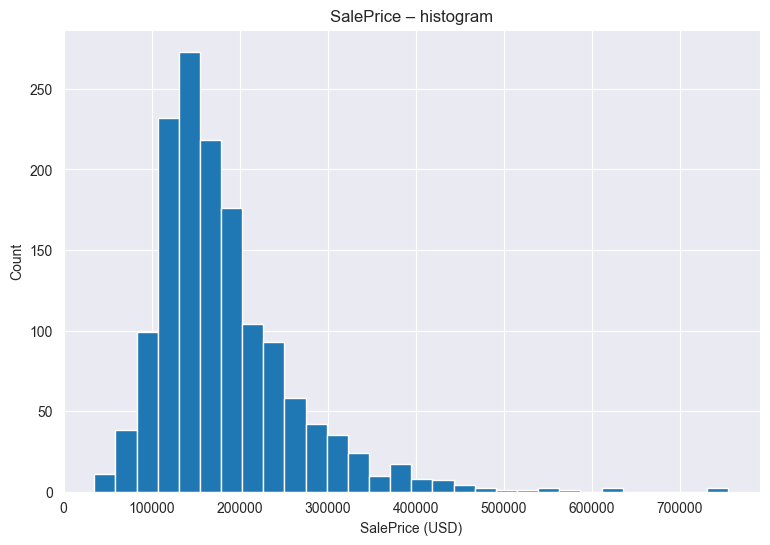

In [21]:
plt.figure(figsize=(9,6))
plt.hist(df["SalePrice"], bins=30)
plt.title("SalePrice – histogram")
plt.xlabel("SalePrice (USD)")
plt.ylabel("Count")
plt.show()

### Modify bins
- Perhaps we want to visualize the histogram with more dense or coarse bins
- *bins* attribute

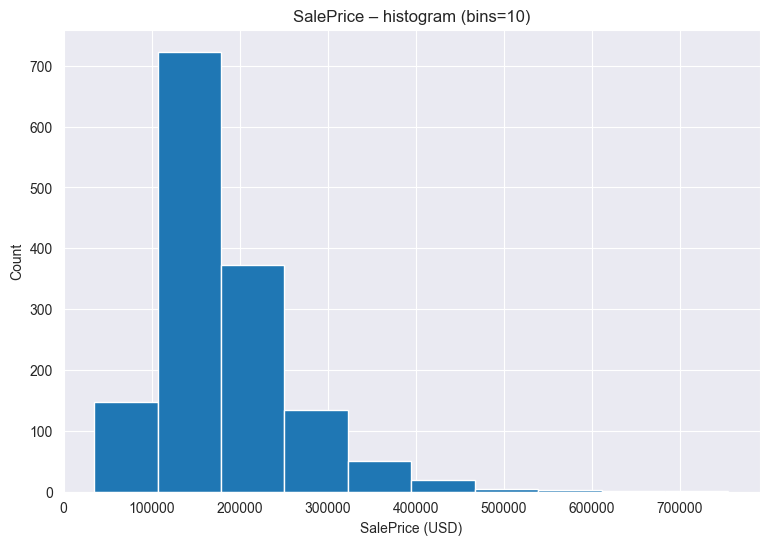

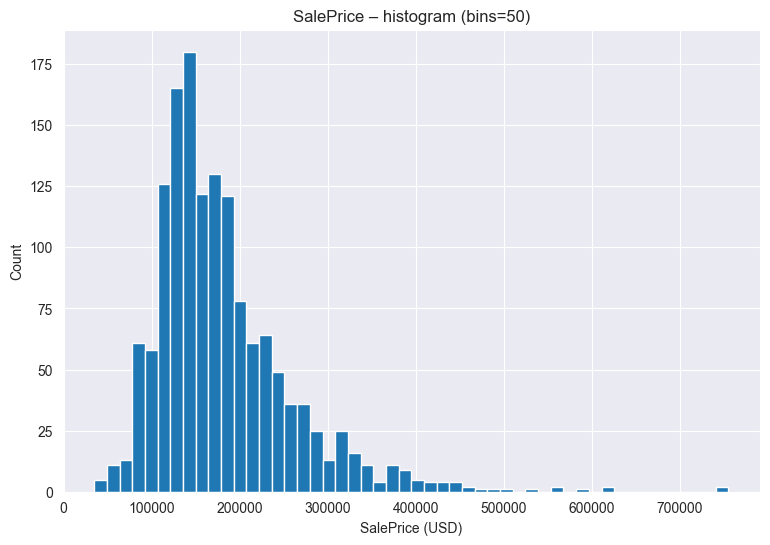

In [22]:
# menej košov = hrubší pohľad
plt.figure(figsize=(9,6))
plt.hist(df["SalePrice"], bins=10)
plt.title("SalePrice – histogram (bins=10)")
plt.xlabel("SalePrice (USD)")
plt.ylabel("Count")
plt.show()

# viac košov = detailnejší pohľad
plt.figure(figsize=(9,6))
plt.hist(df["SalePrice"], bins=50)
plt.title("SalePrice – histogram (bins=50)")
plt.xlabel("SalePrice (USD)")
plt.ylabel("Count")
plt.show()


### Use quartiles (Q1, Q3) for highlighting most common price range in histogram

* Check functions *describe* and *quantile* over price column

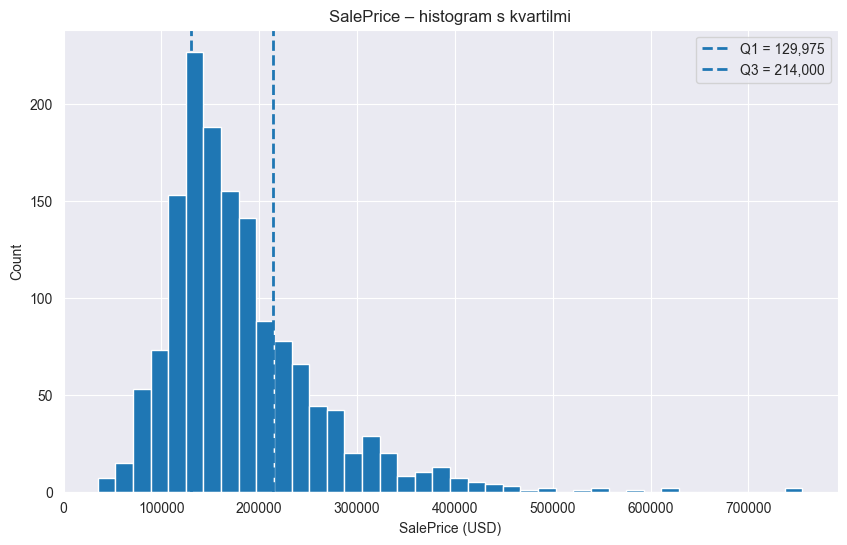

In [25]:
q1 = df["SalePrice"].quantile(0.25)
q3 = df["SalePrice"].quantile(0.75)

plt.figure(figsize=(10,6))
plt.hist(df["SalePrice"], bins=40)
# vertikálne čiary na kvartily
plt.axvline(q1, linestyle="--", linewidth=2, label=f"Q1 = {int(q1):,}")
plt.axvline(q3, linestyle="--", linewidth=2, label=f"Q3 = {int(q3):,}")
plt.title("SalePrice – histogram s kvartilmi")
plt.xlabel("SalePrice (USD)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [26]:
q1, q3

(np.float64(129975.0), np.float64(214000.0))

## 🔎 What can we say about prices based on the quantiles?
### Use function *axvline* from Matplotlib to draw vertical lines at the quartile positions

In [28]:
print(f"Q1 (25%): {q1:,.0f} USD")
print(f"Q3 (75%): {q3:,.0f} USD")

print("\nInterpretácia:")
print("• Väčšina domov sa predáva medzi Q1 a Q3 — teda v rozmedzí približne 130k až 214k USD.")
print("• Rozdelenie je pravostranné — teda väčšina domov je lacnejšia, ale existuje pár veľmi drahých nehnuteľností.")
print("• Hodnoty nad Q3 sú outliery – väčšie alebo luxusné domy s výrazne vyššou cenou.")


Q1 (25%): 129,975 USD
Q3 (75%): 214,000 USD

Interpretácia:
• Väčšina domov sa predáva medzi Q1 a Q3 — teda v rozmedzí približne 130k až 214k USD.
• Rozdelenie je pravostranné — teda väčšina domov je lacnejšia, ale existuje pár veľmi drahých nehnuteľností.
• Hodnoty nad Q3 sú outliery – väčšie alebo luxusné domy s výrazne vyššou cenou.


## 📊 Let's add more complexity to histogram vizualizations. 
### Does price change for different values of GaragaFinish attribute?

### GarageFinish: Interior finish of the garage
- Fin	Finished
- RFn	Rough Finished	
- Unf	Unfinished
- NA	No Garage

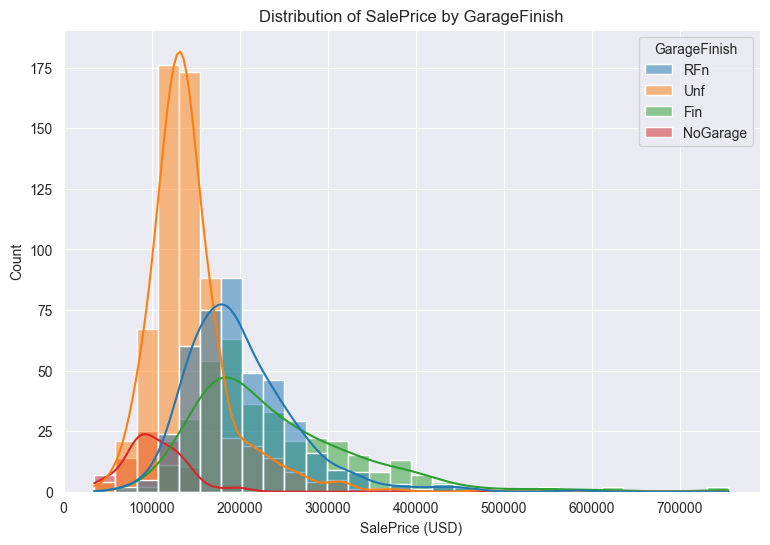

In [31]:
plt.figure(figsize=(9,6))
sns.histplot(data=df, x="SalePrice", hue="GarageFinish", bins=30, kde=True)
plt.title("Distribution of SalePrice by GarageFinish")
plt.xlabel("SalePrice (USD)")
plt.ylabel("Count")
plt.show()


### 💡 We can see that houses with no garage are somehow missing
- The no garage houses have a *nan* value in the feature so they are not plotted

### Fill nan values with 'NoGarage' string

In [30]:
df["GarageFinish"] = df["GarageFinish"].fillna("NoGarage")
df["GarageFinish"].value_counts()


GarageFinish
Unf         605
RFn         422
Fin         352
NoGarage     81
Name: count, dtype: int64

### Take a look at the histogram again

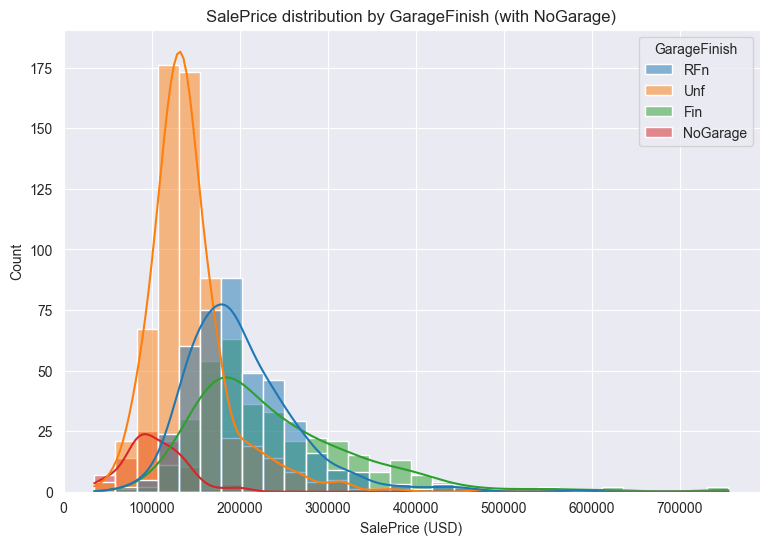

In [32]:
plt.figure(figsize=(9,6))
sns.histplot(data=df, x="SalePrice", hue="GarageFinish", bins=30, kde=True)
plt.title("SalePrice distribution by GarageFinish (with NoGarage)")
plt.xlabel("SalePrice (USD)")
plt.ylabel("Count")
plt.show()


## 💡 Sometimes the histograms distinguished by colors are not easily redeable
- We can use *col* attribute to automatically plot every histogram on its own canvas

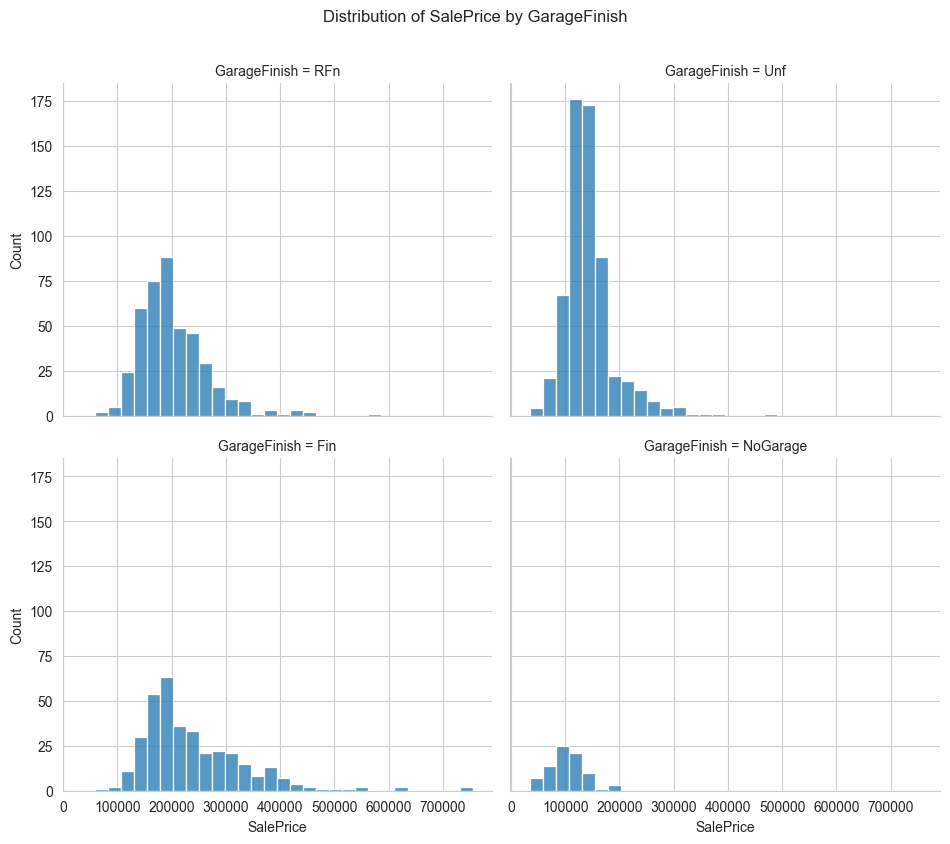

In [36]:
sns.displot(
    data=df,
    x="SalePrice",
    col="GarageFinish",   # každý typ garáže dostane vlastný graf
    bins=30,
    kde=True,             # pridá hladkú krivku
    col_wrap=2,           # 2 grafy v jednom riadku
    height=4,             # výška jedného grafu
    aspect=1.2            # pomer strán
)

plt.suptitle("Distribution of SalePrice by GarageFinish", y=1.05)
plt.show()

# 📊 Another very useful tecnique for the numerical features distributions are boxplots
- 🔎 Did you see any of these before?

- 🔎 How should we read boxplots?
    - **Quartiles**
    - **Median**
    - Box size
    - **Outliers and IQR**
    - Min/max - with or without outliers

### Plot only the *SalePrice* using boxplot

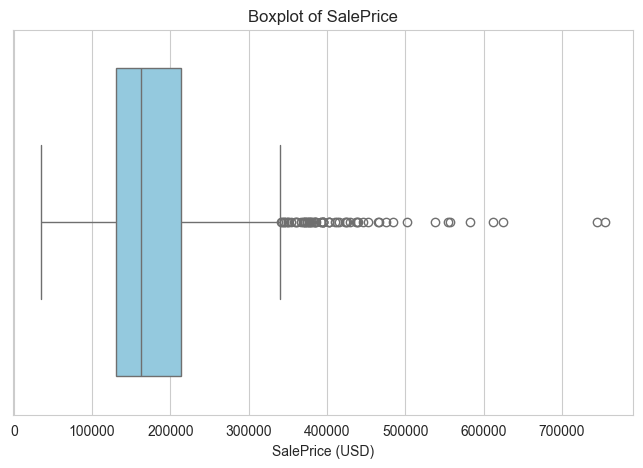

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["SalePrice"], color="skyblue")
plt.title("Boxplot of SalePrice")
plt.xlabel("SalePrice (USD)")
plt.show()

## Let's take a look at the *SalePrice* for different *BldgType* values 
- 🔎 What can we say about the prices?

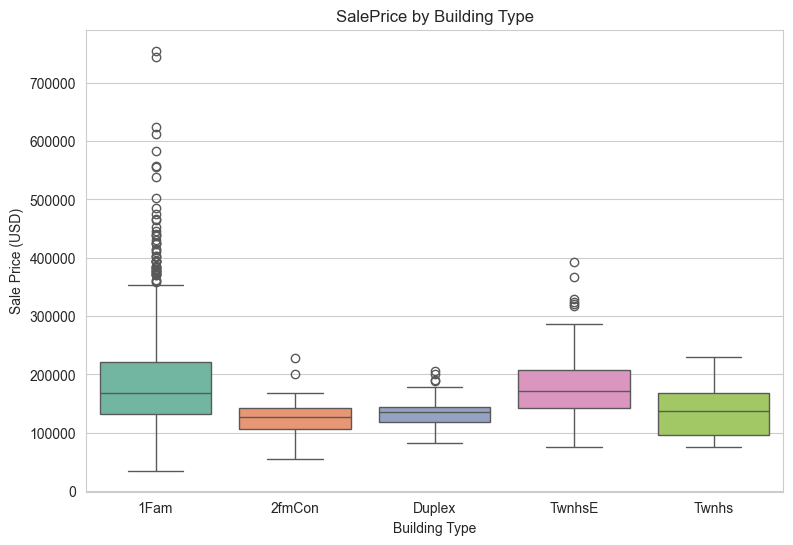

In [43]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df, x="BldgType", y="SalePrice", hue="BldgType", palette="Set2", legend=False)
plt.title("SalePrice by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Sale Price (USD)")
plt.show()

## We can do the same for *GrLivArea*

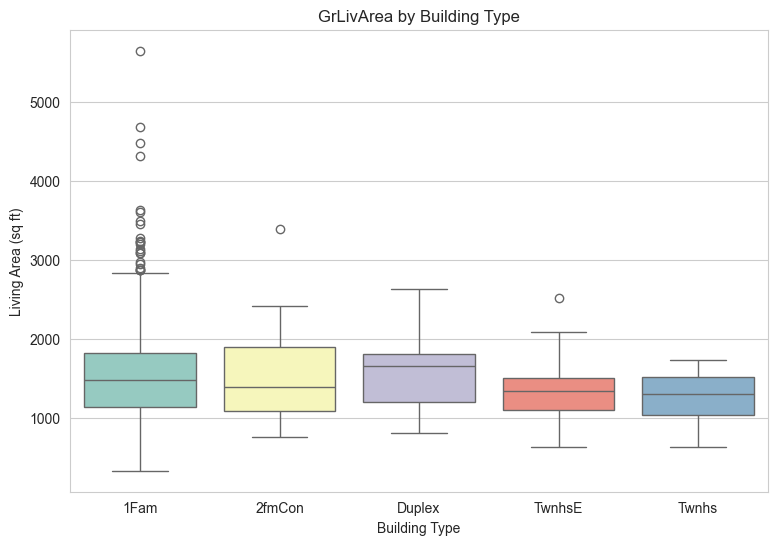

In [45]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df, x="BldgType", y="GrLivArea", hue="BldgType", palette="Set3", legend=False)
plt.title("GrLivArea by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Living Area (sq ft)")
plt.show()

## Let's take a look at the *GrLivArea* for different *BldgType* values 
- 🔎 What can we say about the GrLivArea?

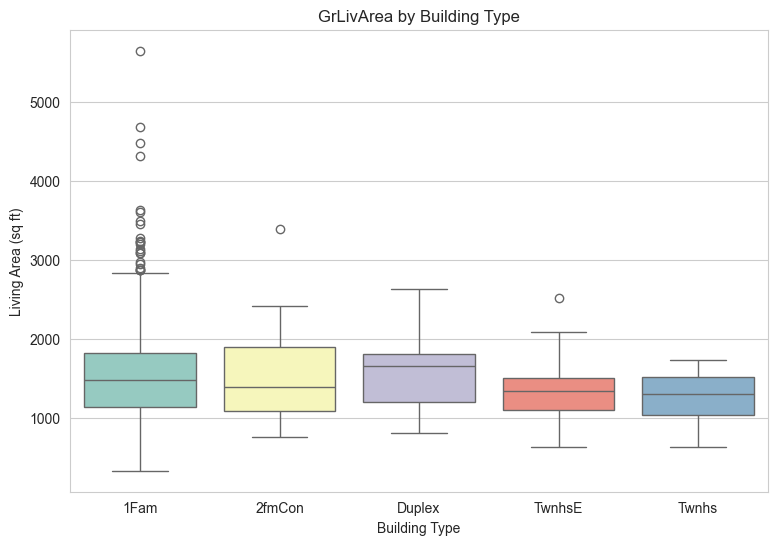

In [47]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df,x="BldgType", y="GrLivArea", hue="BldgType", palette="Set3", legend=False)
plt.title("GrLivArea by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Living Area (sq ft)")
plt.show()

# 📊 Scatter plots are commonly used for visualizing two numerical variables

### We can use standard *scatterplot* with *BldgType* as a *hue* so we can better grasp the relationship between *GrLivArea* and *SalePrice*
* Try to set *alpha* parameter for opacity settings

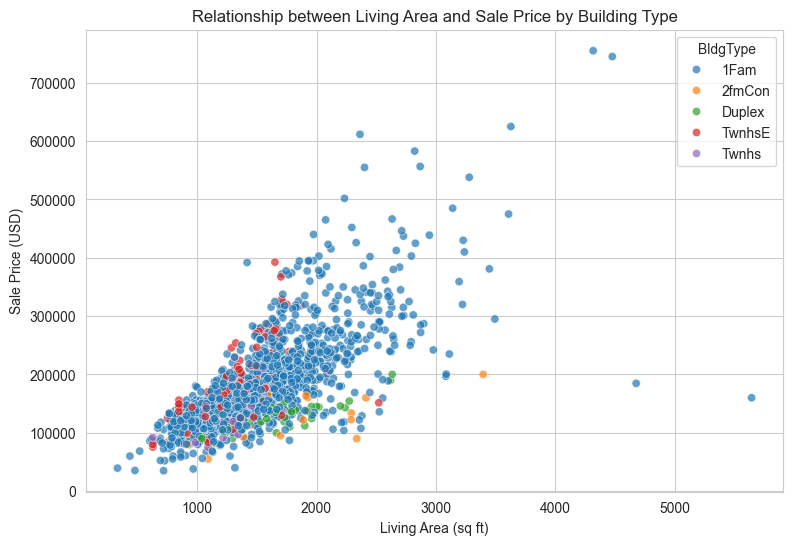

In [53]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", hue="BldgType", alpha=0.7)
plt.title("Relationship between Living Area and Sale Price by Building Type")
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Sale Price (USD)")
plt.show()

### We can see there are some outliers in the data, let's zoom only to area without them, how can we filter the data?

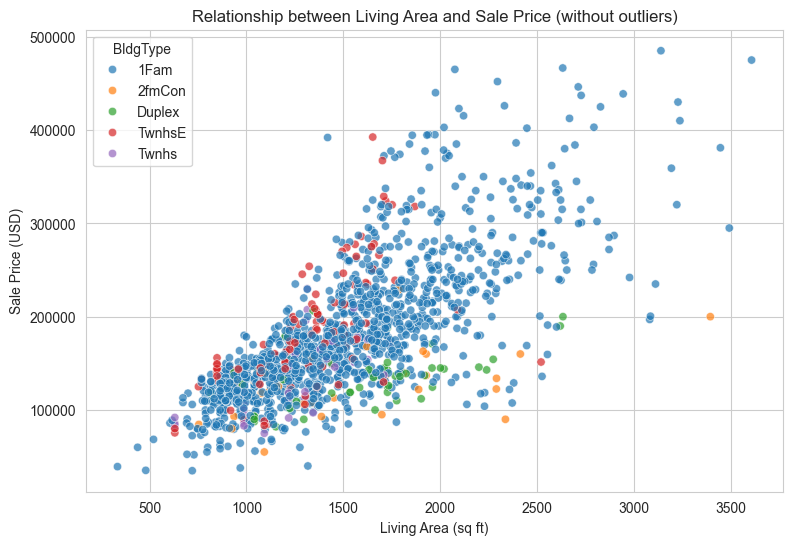

In [58]:
# Filtrovanie dát - odstránime extrémy
df_filtered = df[(df["GrLivArea"] < 4000) & (df["SalePrice"] < 500000)]

plt.figure(figsize=(9,6))
sns.scatterplot(data=df_filtered, x="GrLivArea", y="SalePrice", hue="BldgType", alpha=0.7)
plt.title("Relationship between Living Area and Sale Price (without outliers)")
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Sale Price (USD)")
plt.show()

# We have an information about a month and a year for the sold houses.
## 🔎 Can you vizualize what was the average price of the house by quarters?

* We need to create a new column **YearQuarterSold** with merged Year and Quarter information in this pattern: '2010-1','2010-2' and so on first
    * We can map the values using the *apply* function or use string concatenation directly
* 💡 If you need to change data type of the columns, you can use *astype*

In [59]:
# Zmeníme typ na int (ak by nebol)
df["YrSold"] = df["YrSold"].astype(int)
df["MoSold"] = df["MoSold"].astype(int)

# Funkcia na určenie štvrťroku (1-4)
def get_quarter(month):
    if month <= 3:
        return 1
    elif month <= 6:
        return 2
    elif month <= 9:
        return 3
    else:
        return 4

# Vytvorenie nového stĺpca YearQuarterSold
df["QuarterSold"] = df["MoSold"].apply(get_quarter)
df["YearQuarterSold"] = df["YrSold"].astype(str) + "-" + df["QuarterSold"].astype(str)

# Skontroluj výsledok
df[["YrSold", "MoSold", "YearQuarterSold"]].head(10)


,YrSold,MoSold,YearQuarterSold
0,2008,2,2008-1
1,2007,5,2007-2
2,2008,9,2008-3
3,2006,2,2006-1
4,2008,12,2008-4
5,2009,10,2009-4
6,2007,8,2007-3
7,2009,11,2009-4
8,2008,4,2008-2
9,2008,1,2008-1


### Compute the average price for the *YearQuarterSold* attribute

In [60]:
avg_price_by_quarter = df.groupby("YearQuarterSold")["SalePrice"].mean().reset_index()
avg_price_by_quarter.head()

,YearQuarterSold,SalePrice
0,2006-1,190553.522727
1,2006-2,168277.176991
2,2006-3,191858.980952
3,2006-4,187993.480769
4,2007-1,178489.159091


## Vizualize the data using *lineplot*
- In case of xlabels mixing try to tune the *rotation* and *horizontalalignment* parameters

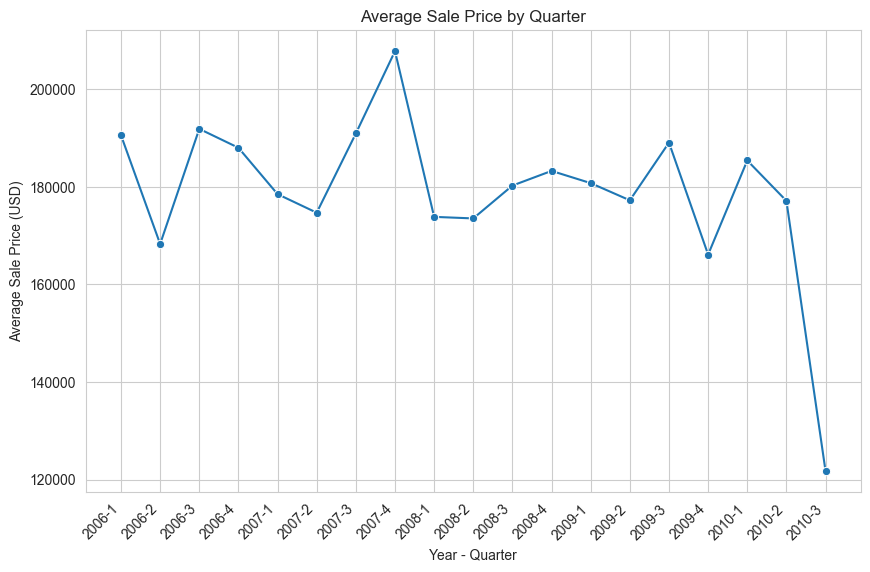

In [63]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_price_by_quarter, x="YearQuarterSold", y="SalePrice", marker="o")
plt.title("Average Sale Price by Quarter")
plt.xlabel("Year - Quarter")
plt.ylabel("Average Sale Price (USD)")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.show()

### Add the max, min and median to the plot
- Use *describe* and the [Pandas Melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function
    - use YearQuarterSold as an *id_vars*
    - use 'min', 'mean', '50%', 'max' as *value_vars*

In [77]:
# describe() vráti všetky základné štatistiky pre každú skupinu
stats = df.groupby("YearQuarterSold")["SalePrice"].describe()

# necháme si len požadované stĺpce
stats = stats[["min", "mean", "50%", "max"]].reset_index()
stats.head()

,YearQuarterSold,min,mean,50%,max
0,2006-1,52500.0,190553.522727,172700.0,423000.0
1,2006-2,79000.0,168277.176991,151400.0,475000.0
2,2006-3,80500.0,191858.980952,173900.0,625000.0
3,2006-4,35311.0,187993.480769,161500.0,438780.0
4,2007-1,39300.0,178489.159091,145450.0,755000.0


In [78]:
stats_melted = stats.melt(
    id_vars="YearQuarterSold",
    value_vars=["min", "mean", "50%", "max"],
    var_name="Statistic",
    value_name="SalePrice"
)
stats_melted.head()

,YearQuarterSold,Statistic,SalePrice
0,2006-1,min,52500.0
1,2006-2,min,79000.0
2,2006-3,min,80500.0
3,2006-4,min,35311.0
4,2007-1,min,39300.0


![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_01.png?raw=true)

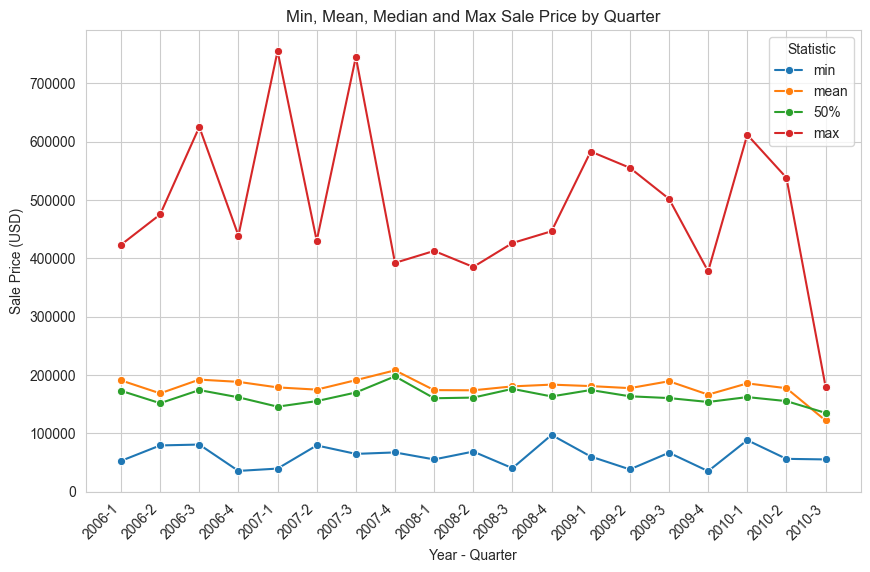

In [79]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=stats_melted,
    x="YearQuarterSold",
    y="SalePrice",
    hue="Statistic",
    marker="o"
)
plt.title("Min, Mean, Median and Max Sale Price by Quarter")
plt.xlabel("Year - Quarter")
plt.ylabel("Sale Price (USD)")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.show()


## What can we say about the minimum and maximum values?
- 💡Take a look at std. deviation

In [80]:
# Spočítaj štandardnú odchýlku (std) pre každý štvrťrok
std_by_quarter = df.groupby("YearQuarterSold")["SalePrice"].std().reset_index()
std_by_quarter.rename(columns={"SalePrice": "StdDeviation"}, inplace=True)
std_by_quarter.head()


,YearQuarterSold,StdDeviation
0,2006-1,71075.435079
1,2006-2,69911.153137
2,2006-3,89590.623994
3,2006-4,81497.678182
4,2007-1,119137.563987


# We can take a look at number of sold houses for the defined time periods as well
## 📊 We will use standard bar plot
- 🔎 In which quarter were the most houses sold?
- 💡 Fun facts: [https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home](https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home)

In [81]:
# Spočítaj počet predajov (riadkov) pre každý štvrťrok
sales_count = df["YearQuarterSold"].value_counts().reset_index()
sales_count.columns = ["YearQuarterSold", "Count"]
sales_count = sales_count.sort_values("YearQuarterSold")

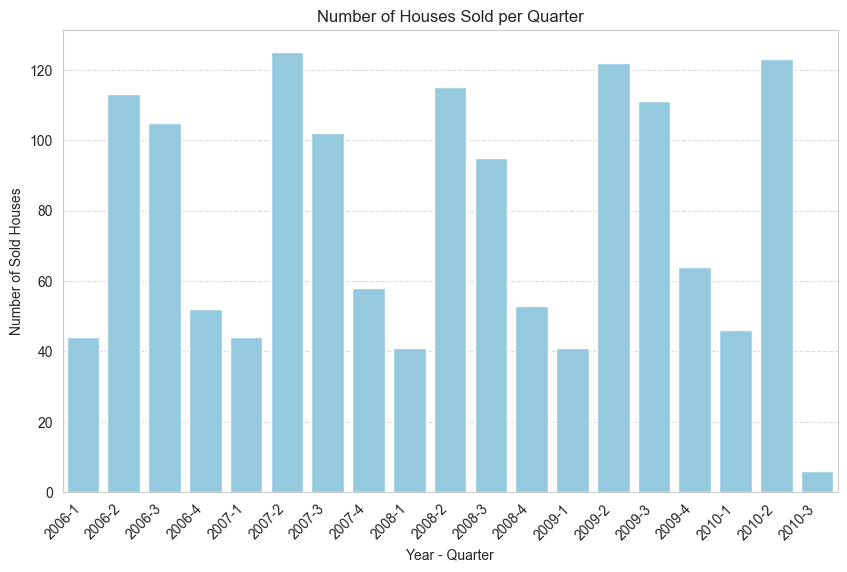

In [82]:
# Vizualizácia
plt.figure(figsize=(10,6))
sns.barplot(data=sales_count, x="YearQuarterSold", y="Count", color="skyblue")
plt.title("Number of Houses Sold per Quarter")
plt.xlabel("Year - Quarter")
plt.ylabel("Number of Sold Houses")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Tasks (2p)
## ✅ Task 1 - Outlier detection (1p)
- We need to somehow mark the outliers in the data according to the *SalePrice* and *GrLivArea*
    - One possibility is to compute [IQR](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) for both columns and mark outliers using lower and upper bounds
    - Lower bound: Q1 - 1.5*IQR
    - Upper bound: Q3 + 1.5*IQR
- 💡 If the house has *SalePrice* **OR** *GrLivArea* value outside of the bounds - it is an outlier
- Vizualize the data using scatter plot and distinguish the outlier and non-outlier data using different colors (*hue*) 💡

## ✅ Task 2 - Describe what you see in the data (1p)
- Try to vizualize the relationship between *SalePrice* and *OverallQual*
    - 💡You can use BoxPlots, Scatter plots, etc., the choice of a right plot type is up to you 🙂
- Do the same for *SalePrice* and *OverallCond*; i.e. vizualize and describe insight-
- **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
    - ❌ Plot interpretation figured in real-time during task check is not allowed! ❌